# 数据解析

数据格式分为非结构化和结构化两种.<b>非结构化数据</b>是指数据结构不规则或不完整,没有预定义的数据模型,不方便使用数据库二维逻辑来表现的数据,包括所有格式的办公文档,文本,HTML,图像等.<b>结构化数据</b>就是能够用数据或统一的结构加以表示,具有模式的数据,包括XML和JSON等

## 一.网页解析技术

借助网页解析器从网页中解析和提取出有价值的数据,或者新的URL列表.python支持一些解析网页的技术,分别为<b>正则表达式</b>,<b>XPath</b>,<b>Beautiful Soup</b>和<b>JSONPath</b>.其中：
1. 针对文本的解析,正则表达式
2. 针对HTML/XML的解析,有XPath,Beautiful Soup,正则表达式
3. 针对JSON的解析,有JSONPath

## 二.正则表达式

正则表达式是一个用于处理字符串的强大工具,通常被用来检索和替换那些符号规则的文本,可以查看[re详解](https://docs.python.org/3/howto/regex.html),或者查看[re](https://www.yuque.com/lq6h/201901/re)

`re`模块的一般使用步骤如下;
1. 使用`compile()`函数将正则表达式以字符串形式编译为一个Pattern类型的对象
2. 通过Pattern对象提供的一系列方法对文本进行查找或替换,得到一个处理结果
3. 使用处理结果提供的属性和方法获得信息

In [2]:
import re

title="世界,hello,你好"

# 匹配中文
# 中文对应的Unicode编码范围 [u4e00-u9fa5]
pattern=re.compile(r"[\u4e00-\u9fa5]+")

result=pattern.findall(title)

print(result)

['世界', '你好']


## 三.XPath与lxml

与正则的使用不同,XPath是基于文档的层次结构来确定查找路径的.为了能在python中使用XPath语法,提供了一个第三方库lxml

### 1.XPath概述

XPath(XML Path Language)即为XML路径语言,用于确定XML树结构中某一部分的位置.XPath基于XML的树结构,能够在树结构中遍历节点(元素,属性等)

<b>注意</b>：XPath不仅能够查询XML文档,而且能够查询HTML文档.但是,它需要先借用lxml库技术将HTML文档转换为XML文档树对象,之后可以使用XPath语法查找此结构中的节点或元素

### 2.XPath语法

#### 选取节点

节点是沿着路径选取的,既可以从根节点开始,也可以从任意位置开始

|表达式|说明|
|---|---|
|nodename|选取此节点的所有子节点|
|/|从根节点选取|
|//|从匹配选择的当前节点选取文档中的节点,而不用考虑它们的位置
|.|选取当前节点|
|..|选取当前节点的父节点|
|@|选取属性|

XML文档的示例：

In [ ]:
<bookstore>
    <book category="COOKING">
      <title lang="en">Everyday Italian</title> 
      <author>Giada De Laurentiis</author> 
      <year>2005</year> 
      <price>30.00</price> 
    </book>
    <book category="CHILDREN">
      <title lang="en">Harry Potter</title> 
      <author>J K. Rowling</author> 
      <year>2005</year> 
      <price>29.99</price> 
    </book>
    <book category="WEB">
      <title lang="en">Learning XML</title> 
      <author>Erik T. Ray</author> 
      <year>2003</year> 
      <price>39.95</price> 
    </book>
</bookstore>

### 3.开发工具

对于Chrome浏览器,使用XPath Helper解析网站

获得手机图片的文字

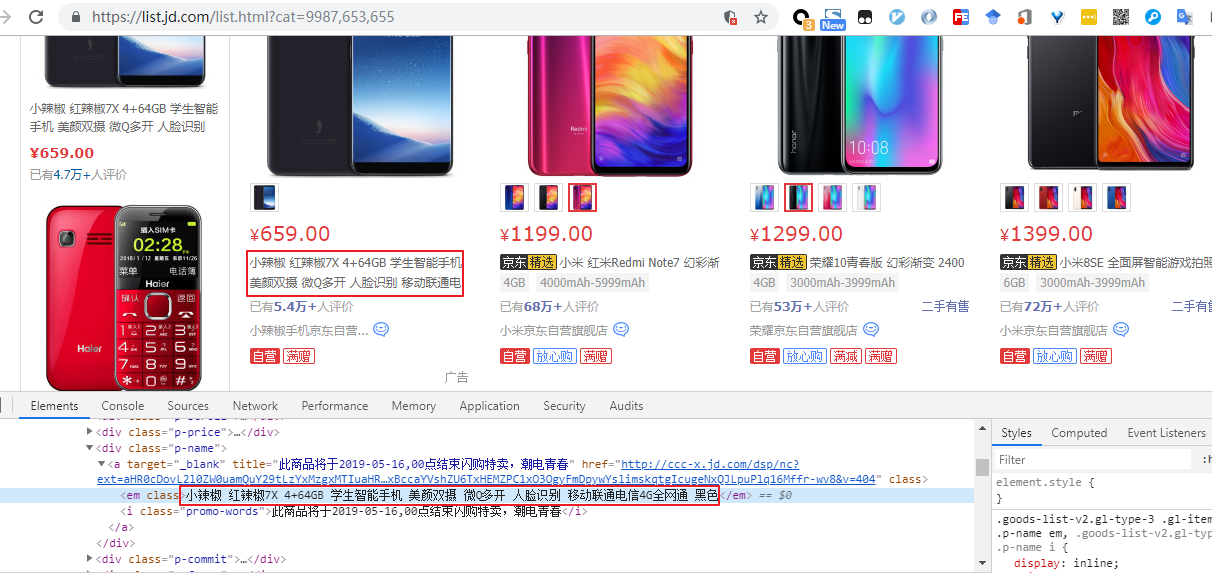

In [1]:
from IPython.display import Image

Image(filename="./data/5_1.png",width=500)

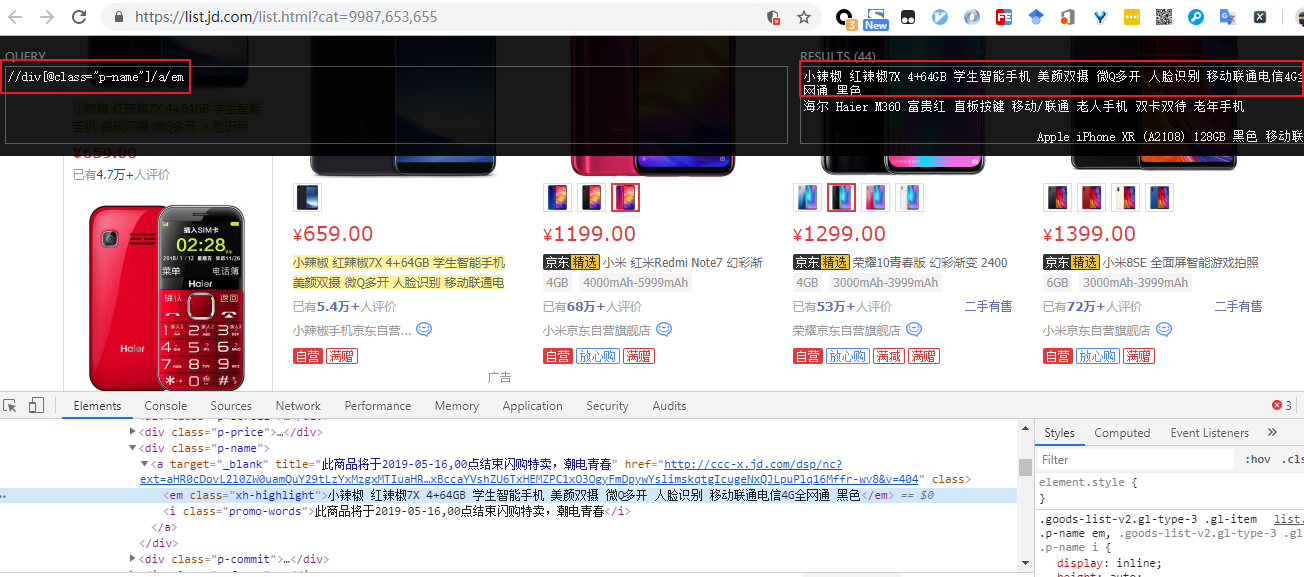

In [2]:
Image(filename="./data/5_2.png",width=500)

### 4.lxml库

`lxml`是使用python语言编写的库,主要用于解析和提取HTML或者XML格式的数据.`lxml`库中大部分功能都位于`lxml.tree`模块中

In [3]:
from lxml import etree

`lxml`库的一些相关类如下：
1. Element类：可以理解为XML的节点
2. ElementTree类：可以理解为一个完整的XML文档树
3. ElementPath类：可以理解为XPath,用于搜索和定位节点

#### Element类

`Element`类是XML处理的核心类,可以直观地理解为XML的节点,大部分XML节点的处理都是围绕着Element类进行的.要想创建一个节点对象,则可以通过构造函数直接创建

In [4]:
# root表示节点的名称
root=etree.Element("root")

关于`Element`类的相关操作,主要可分为三部分,分别是<b>节点操作</b>,<b>节点属性的操作</b>和<b>节点内文本的操作</b>

In [5]:
# 节点操作：获取节点名称,使用tag属性
print(root.tag)

root


In [6]:
# 节点属性的操作：属性以ker-value形式存储
root=etree.Element("root",interesting="totally")

print(etree.tostring(root))

b'<root interesting="totally"/>'


In [8]:
# 通过set()方法添加属性
root.set("age","30")

print(etree.tostring(root))

b'<root interesting="totally" age="30"/>'


In [9]:
# 节点内文本操作：text,tail或者xpath()方法
root.text="hello wold"

print(root.text)
print(etree.tostring(root))

hello wold
b'<root interesting="totally" age="30">hello wold</root>'


#### 从字符串或文件中解析XML

为了能够将XML文件解析为树结构,`etree`模块中提供了如下3个函数：
1. fromstring()：从字符串中解析XML文档或片段,返回根节点
2. XML()：从字符串常量中解析XML文档或片段,返回根节点
3. HTML()：从字符串常量中解析HTML文档或片段,返回根节点

In [12]:
xml_data="<root>data</root>"

root_one=etree.fromstring(xml_data)
print(root_one.tag)
print(etree.tostring(root_one))

root_two=etree.XML(xml_data)
print(root_two.tag)
print(etree.tostring(root_two))

# 如果没有<html>和<body>标签,会自动补上
root_three=etree.HTML(xml_data)
print(root_three.tag)
print(etree.tostring(root_three))

root
b'<root>data</root>'
root
b'<root>data</root>'
html
b'<html><body><root>data</root></body></html>'


## 五.Beautiful Soup

### 1.bs的介绍

<b>bs4</b>库会将复杂的HTML文档换成树结构(HTML DOM),这个结构中的每个节点都是一个python对象.这些对象可以归纳为如下几种：
1. bs4.element.Tag类:表示HTML中的标签,是最基本的信息组织单元,它由两个非常重要的属性,分别是表示标签名字的`name`属性和表示标签属性的`attrs`属性
2. bs4.element.NavigableString类：表示HTML中的标签的文本(非属性字符串)
3. bs4.BeautifulSoup类：表示HTML DOM中的全部内容,支持遍历文档树和搜索文档树的大部分方法
4. bs4.element.Comment类：表示标签内字符串的注释部分,是一种特殊的<b>NavigableString</b>

使用bs4的一般流程如下：
1. 创建一个BeautifulSoup类型的对象
根据HTML或者文件创建BeautifulSoup对象
2. 通过BeautifulSoup对象的操作方法进行解读搜索
根据DOM树进行各种节点的搜索,只要获得一个节点,就可以访问节点的名称,属性和文本
3. 利用DOM树结构标签的特性,进行更为详细的节点信息提取
在搜索节点时,也可以按照节点的名称,节点的属性或者节点的文字进行搜索

### 2.构建BeautifulSoup对象

通过一个字符串或者类文件对象可以创建BeautifulSoup类的对象.构造方法如下：

In [1]:
from bs4 import BeautifulSoup

with open("html_docs.html","rb") as f:
    html_doc=f.read()

soup=BeautifulSoup(html_doc,"lxml")

In [2]:
print(soup.prettify())

<html>
 <body>
  <div class="wrap1">
   <div class="wrap2">
    <div class="header">
     <div id="pagelet_common/pagelet/userbar">
     </div>
     <div class="search_bright clearfix" id="head">
      <div class="head_inner">
       <div class="search_top clearfix">
        <div class="search_nav j_search_nav">
         <!-- 资讯、贴吧、知道、视频、音乐、图片、地图、文库 -->
         <a href="https://www.baidu.com/s?cl=3&amp;" param="wd" rel="noreferrer">
          网页
         </a>
         <a href="http://www.baidu.com/s?rtt=1&amp;bsst=1&amp;cl=2&amp;tn=news&amp;fr=tieba&amp;" param="word" rel="noreferrer">
          资讯
         </a>
         <b>
          贴吧
         </b>
         <a href="http://zhidao.baidu.com/q?ct=17&amp;pn=0&amp;tn=ikaslist&amp;rn=10&amp;" param="word" rel="noreferrer">
          知道
         </a>
         <!-- <a rel="noreferrer"  param="word" href="http://v.baidu.com/v?ct=301989888&amp;rn=20&amp;pn=0&amp;db=0&amp;s=21&amp;">视频</a> -->
         <a href="http://www.baidu.com/sf/vsearc

### 3.通过操作方法进行解读

网页中有用的信息都存在于网页中的文本或者各种不同标签的属性值.为了能获得这些有用的网页信息,可以通过一些查找方法获取文本或者标签属性.其中常用的两个方法功能如下：
1. find()：用于查找符合查询条件的第一个标签节点
2. find_all()：查找所有符合查询条件的标签节点,并返回一个列表

In [ ]:
find_all(self,name=None,attrs={},recursive=True,text=None,limit=None,**kwargs)

#### name参数

In [6]:
# 传入字符串
soup.find_all("b")

[<b>贴吧</b>]

In [7]:
# 传入正则表达式
import re

for tag in soup.find_all(re.compile("^b")):
    print(tag.name)

body
b


In [8]:
# 传入列表
soup.find_all(["a","b"])

[<a href="https://www.baidu.com/s?cl=3&amp;" param="wd" rel="noreferrer">网页</a>,
 <a href="http://www.baidu.com/s?rtt=1&amp;bsst=1&amp;cl=2&amp;tn=news&amp;fr=tieba&amp;" param="word" rel="noreferrer">资讯</a>,
 <b>贴吧</b>,
 <a href="http://zhidao.baidu.com/q?ct=17&amp;pn=0&amp;tn=ikaslist&amp;rn=10&amp;" param="word" rel="noreferrer">知道</a>,
 <a href="http://www.baidu.com/sf/vsearch?pd=video&amp;tn=vsearch&amp;ct=301989888&amp;rn=20&amp;pn=0&amp;db=0&amp;s=21&amp;rsv_spt=11&amp;" param="word" rel="noreferrer">视频</a>,
 <a href="http://music.baidu.com/search?fr=tieba&amp;" param="key" rel="noreferrer">音乐</a>,
 <a href="http://image.baidu.com/i?tn=baiduimage&amp;ct=201326592&amp;lm=-1&amp;cl=2&amp;" param="word" rel="noreferrer">图片</a>,
 <a href="http://map.baidu.com/m?fr=map006&amp;" param="word" rel="noreferrer">地图</a>,
 <a href="http://wenku.baidu.com/search?fr=tieba&amp;lm=0&amp;od=0&amp;" param="word" rel="noreferrer" target="_blank">文库</a>,
 <a class="search_logo" href="/" id="search_

#### attrs参数

如果某个指定名字的参数不是搜索方法中内置的参数名,那么在进行搜索时,会把该参数当作指定名称的标签中的属性来搜索

In [11]:
soup.find_all(id="search_logo_large")

[<a class="search_logo" href="/" id="search_logo_large" rel="noreferrer" title="到贴吧首页"></a>]

In [12]:
# class属于python关键字,后面加下划线
soup.find_all("a",class_="search_logo")

[<a class="search_logo" href="/" id="search_logo_large" rel="noreferrer" title="到贴吧首页"></a>]

### 4.CSS选择器搜索

每一条CSS样式定义均为两部分组成,形式如下：
[code] 选择器 {样式} [/code]

为了使用CSS选择器达到筛选节点的目的,在bs4库的BeautifulSoup类提供了一个`select()`方法,该方法会将搜索到的结果放到列表中

#### 通过标签查找

In [14]:
soup.select("b")

[<b>贴吧</b>]

#### 通过类名查找

In [16]:
# 类名的前面加上"."
soup.select(".search_logo")

[<a class="search_logo" href="/" id="search_logo_large" rel="noreferrer" title="到贴吧首页"></a>]

#### id名查找

In [17]:
soup.select("#nowtb")

[<input class="nowtb" id="nowtb" name="tb" type="radio"/>]

#### 组合形式查找

In [ ]:
# 标签p中,id值等于link1的内容


In [18]:
soup.select("p #nowtb")

[<input class="nowtb" id="nowtb" name="tb" type="radio"/>]

In [19]:
# ">"将标签与子标签分隔
soup.select("div > a")

[<a href="https://www.baidu.com/s?cl=3&amp;" param="wd" rel="noreferrer">网页</a>,
 <a href="http://www.baidu.com/s?rtt=1&amp;bsst=1&amp;cl=2&amp;tn=news&amp;fr=tieba&amp;" param="word" rel="noreferrer">资讯</a>,
 <a href="http://zhidao.baidu.com/q?ct=17&amp;pn=0&amp;tn=ikaslist&amp;rn=10&amp;" param="word" rel="noreferrer">知道</a>,
 <a href="http://www.baidu.com/sf/vsearch?pd=video&amp;tn=vsearch&amp;ct=301989888&amp;rn=20&amp;pn=0&amp;db=0&amp;s=21&amp;rsv_spt=11&amp;" param="word" rel="noreferrer">视频</a>,
 <a href="http://music.baidu.com/search?fr=tieba&amp;" param="key" rel="noreferrer">音乐</a>,
 <a href="http://image.baidu.com/i?tn=baiduimage&amp;ct=201326592&amp;lm=-1&amp;cl=2&amp;" param="word" rel="noreferrer">图片</a>,
 <a href="http://map.baidu.com/m?fr=map006&amp;" param="word" rel="noreferrer">地图</a>,
 <a href="http://wenku.baidu.com/search?fr=tieba&amp;lm=0&amp;od=0&amp;" param="word" rel="noreferrer" target="_blank">文库</a>,
 <a class="search_logo" href="/" id="search_logo_large" 

## 六.JSONPath和json

JSON(JavaScript Object Notation)是一种轻量级的数据交换格式,可使人们很容易地进行阅读和编写,同时也方便机器进行解析和生成.JSONPath是一种信息抽取类库,用于从JSON文档中抽取指定信息

### 1.json模块

json模块提供了python对象的序列化和反序列化功能.其中：
1. 序列化(encoding)：将一个python对象编码转换为JSON字符串的过程
2. 反序列化(decoding)：将JSON字符串解码转换为python对象的过程

### 2.json模块使用

json模块提供了4个方法：`dumps()`,`dump()`,`loads()`和`load()`,用于字符串和python数据类型间进行转换.其中`loads()`和`load()`方法用于python对象的反序列化,`dumps()`和`dump()`方法用于python对象的序列化

#### json.loads()

In [20]:
import json

str_list="[1,2,3,4]"
str_dict='{"city":"武汉","name":"小强"}'
print(json.loads(str_list))

print(json.loads(str_dict))

[1, 2, 3, 4]
{'city': '武汉', 'name': '小强'}


#### json.dumps()

In [21]:
import json

demo_list=[1,2,3,4]
demo_tuple=(1,2,3,4)
demo_dict={"city":"武汉","name":"小强"}

print(json.dumps(demo_list))
print(json.dumps(demo_tuple))

# 注意：dumps()处理中文默认使用ASCII编码,会导致中文无法正常显示
print(json.dumps(demo_dict))

# 处理中文时,添加参数ensure_ascii=False来禁用ASCII编码
print(json.dumps(demo_dict,ensure_ascii=False))

[1, 2, 3, 4]
[1, 2, 3, 4]
{"city": "\u6b66\u6c49", "name": "\u5c0f\u5f3a"}
{"city": "武汉", "name": "小强"}


#### json.load()

与`json.loads()`方法的区别在于：一个读取的是字符串,一个读取的是文件

In [27]:
import json

str_list=json.load(open("dictStr.json",encoding="utf-8"))
print(str_list)

{'city': '武汉', 'name': '小强'}


#### json.dump()

In [30]:
import json

str_list=[{"city":"武汉"},{"name":"小强"}]
json.dump(str_list,open("listStr.json","w"),ensure_ascii=False)

str_dict={"city":"武汉","name":"小强"}
json.dump(str_dict,open("dictStr.json","w"),ensure_ascii=False)

### 3.JSONPath语法对比

|XPath|JSONPath|描述|
|---|---|---|
|/|$|根节点|
|.|@|现行节点|
|/|.or[]|取子节点|
|..|n/a|取父节点|
|[]|?()|支持过滤操作|

In [20]:
import json
import jsonpath

books=json.load(open("test.json",encoding="utf-8"))
print(books)

{'store': {'book': [{'category': 'reference', 'author': 'Nigel Rees', 'title': 'Sayings of the Century', 'price': 8.99}, {'category': 'fiction', 'author': 'J.R.Tolien', 'title': 'The Lord of the Rings', 'ISBN': '0-395-19-395', 'price': 22.99}], 'bicycle': {'color': 'red', 'price': 19.99}}}


In [21]:
# store下的bicycle的color属性
checkurl="$.store.bicycle.color"
print(jsonpath.jsonpath(books,checkurl))

['red']


In [22]:
# 输出book节点中包含的所有对象
checkurl="$.store.book[*]"
object_list=jsonpath.jsonpath(books,checkurl)
print(object_list)

[{'category': 'reference', 'author': 'Nigel Rees', 'title': 'Sayings of the Century', 'price': 8.99}, {'category': 'fiction', 'author': 'J.R.Tolien', 'title': 'The Lord of the Rings', 'ISBN': '0-395-19-395', 'price': 22.99}]


In [23]:
# 输出book节点的第一个对象
checkurl="$.store.book[0]"
object=jsonpath.jsonpath(books,checkurl)
print(object)

[{'category': 'reference', 'author': 'Nigel Rees', 'title': 'Sayings of the Century', 'price': 8.99}]


In [24]:
# 输出book节点中所有对象对应的属性title值
checkurl="$.store.book[*].title"
titles=jsonpath.jsonpath(books,checkurl)
print(titles)

['Sayings of the Century', 'The Lord of the Rings']


In [25]:
# 输出book节点中category为fiction的所有对象
checkurl="$.store.book[?(@.category=='fiction')]"
book=jsonpath.jsonpath(books,checkurl)
print(book)

[{'category': 'fiction', 'author': 'J.R.Tolien', 'title': 'The Lord of the Rings', 'ISBN': '0-395-19-395', 'price': 22.99}]


In [26]:
# 输出book节点中所有价格下于10的对象
checkurl="$.store.book[?(@.price<10)]"
price=jsonpath.jsonpath(books,checkurl)
print(price)

[{'category': 'reference', 'author': 'Nigel Rees', 'title': 'Sayings of the Century', 'price': 8.99}]


In [27]:
# 输出book节点中所有含有ISBN的对象
checkurl="$.store.book[?(@.ISBN)]"
ISBN=jsonpath.jsonpath(books,checkurl)
print(ISBN)

[{'category': 'fiction', 'author': 'J.R.Tolien', 'title': 'The Lord of the Rings', 'ISBN': '0-395-19-395', 'price': 22.99}]


### 7.获取拉勾网城市列表

使用JSONPath将所有的城市名称提取出来,保存在一个文件中

In [6]:
import urllib.request
import jsonpath
import json

url="https://www.lagou.com/lbs/getAllCitySearchLabels.json"
request=urllib.request.Request(url)
response=urllib.request.urlopen(request)

html=response.read()

print(html)

b'{"status":false,"msg":"\xe6\x82\xa8\xe6\x93\x8d\xe4\xbd\x9c\xe5\xa4\xaa\xe9\xa2\x91\xe7\xb9\x81,\xe8\xaf\xb7\xe7\xa8\x8d\xe5\x90\x8e\xe5\x86\x8d\xe8\xae\xbf\xe9\x97\xae","clientIp":"223.104.20.88","state":2408}\n'


In [7]:
# json字符串转换成python对象
jsonobj=json.loads(html)

# 从根节点开始,匹配name节点
city_list=jsonpath.jsonpath(jsonobj,"$..name")
print(city_list)

False


In [12]:
# json字符串转换成python对象
jsonobj=json.load(open("./data/getAllCitySearchLabels.json",encoding="utf-8"))

# 从根节点开始,匹配name节点
city_list=jsonpath.jsonpath(jsonobj,"$..name")
print(city_list)

['安庆', '澳门特别行政区', '鞍山', '安康', '安顺', '安阳', '阿克苏', '北京', '保定', '北海', '包头', '蚌埠', '滨州', '毕节', '巴中', '亳州', '保山', '宝鸡', '本溪', '白城', '巴音郭楞', '百色', '白山', '成都', '长沙', '重庆', '常州', '长春', '沧州', '潮州', '郴州', '赤峰', '承德', '常德', '滁州', '池州', '朝阳', '昌吉', '东莞', '大连', '德州', '东营', '大庆', '德阳', '大同', '达州', '丹东', '定西', '大理', '德宏', '迪庆', '儋州', '恩施', '鄂州', '鄂尔多斯', '佛山', '福州', '阜阳', '抚州', '防城港', '抚顺', '广州', '贵阳', '桂林', '赣州', '广安', '广元', '贵港', '高雄', '杭州', '合肥', '哈尔滨', '惠州', '海口', '呼和浩特', '湖州', '邯郸', '淮安', '海外', '衡阳', '衡水', '河源', '菏泽', '怀化', '黄石', '淮北', '鹤壁', '汉中', '黄冈', '淮南', '葫芦岛', '黄山', '红河', '河池', '鹤岗', '呼伦贝尔', '贺州', '黑河', '济南', '嘉兴', '金华', '江门', '济宁', '吉安', '吉林', '晋中', '荆州', '揭阳', '九江', '晋城', '锦州', '酒泉', '荆门', '景德镇', '佳木斯', '焦作', '金昌', '济源', '昆明', '开封', '喀什', '廊坊', '洛阳', '临沂', '兰州', '拉萨', '聊城', '柳州', '连云港', '龙岩', '六安', '泸州', '临汾', '六盘水', '吕梁', '莱芜', '乐山', '丽水', '丽江', '凉山彝族自治州', '来宾', '辽源', '娄底', '辽阳', '漯河', '绵阳', '眉山', '梅州', '茂名', '马鞍山', '牡丹江', '南京', '宁波', '南昌', '南宁', '南通', '南阳', '南充', '内江', '宁德', '南平', '莆田',

In [14]:
file=open("./data/city.json","w")

content=json.dumps(city_list,ensure_ascii=False)

print(content)

["安庆", "澳门特别行政区", "鞍山", "安康", "安顺", "安阳", "阿克苏", "北京", "保定", "北海", "包头", "蚌埠", "滨州", "毕节", "巴中", "亳州", "保山", "宝鸡", "本溪", "白城", "巴音郭楞", "百色", "白山", "成都", "长沙", "重庆", "常州", "长春", "沧州", "潮州", "郴州", "赤峰", "承德", "常德", "滁州", "池州", "朝阳", "昌吉", "东莞", "大连", "德州", "东营", "大庆", "德阳", "大同", "达州", "丹东", "定西", "大理", "德宏", "迪庆", "儋州", "恩施", "鄂州", "鄂尔多斯", "佛山", "福州", "阜阳", "抚州", "防城港", "抚顺", "广州", "贵阳", "桂林", "赣州", "广安", "广元", "贵港", "高雄", "杭州", "合肥", "哈尔滨", "惠州", "海口", "呼和浩特", "湖州", "邯郸", "淮安", "海外", "衡阳", "衡水", "河源", "菏泽", "怀化", "黄石", "淮北", "鹤壁", "汉中", "黄冈", "淮南", "葫芦岛", "黄山", "红河", "河池", "鹤岗", "呼伦贝尔", "贺州", "黑河", "济南", "嘉兴", "金华", "江门", "济宁", "吉安", "吉林", "晋中", "荆州", "揭阳", "九江", "晋城", "锦州", "酒泉", "荆门", "景德镇", "佳木斯", "焦作", "金昌", "济源", "昆明", "开封", "喀什", "廊坊", "洛阳", "临沂", "兰州", "拉萨", "聊城", "柳州", "连云港", "龙岩", "六安", "泸州", "临汾", "六盘水", "吕梁", "莱芜", "乐山", "丽水", "丽江", "凉山彝族自治州", "来宾", "辽源", "娄底", "辽阳", "漯河", "绵阳", "眉山", "梅州", "茂名", "马鞍山", "牡丹江", "南京", "宁波", "南昌", "南宁", "南通", "南阳", "南充", "内江", "宁德", "南平", "莆田",

In [15]:
# JSON格式的字符串写入本地文件
file.write(content)
file.close()

## 七.招聘网站信息

In [27]:
import urllib.request

class Spider(object):
    def __init__(self):
        # 起始页位置
        self.begin_page=int(input("请输入起始页："))
        self.end_page=int(input("请输入终止页："))


    def load_page(self):

        user_agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36"

        headers={
            "User-Agent":user_agent
        }

        for page in range(self.begin_page,self.end_page+1):
            base_url="https://www.zhipin.com/c101200100/?query=python&page="+str(page)

            request=urllib.request.Request(base_url,headers=headers)

            response=urllib.request.urlopen(request)

            html=response.read().decode("utf-8")

            return html

In [28]:
spider=Spider()
html=spider.load_page()

请输入起始页： 1
请输入终止页： 1


### 1.使用正则解析网页

In [29]:
import re

names_list=re.findall(r'title">(.*?)</div>',html)

In [32]:
names_list.pop(-1)

'我的&nbsp;&gt;&nbsp;登录网页版'

In [40]:
len(names_list)

30

In [38]:
links=re.findall(r'href=(.*?) data-jid',html)

In [41]:
len(links_list)

30

In [50]:
a=[]

for i in range(1,60):
    a.append(i)

### 2.使用lxml解析网页

In [71]:
def lxml_parse_page(self,html):
    """
    :param html: 待解析网页
    :return: 工作信息列表
    """
    from lxml import etree

    # 从字符串中解析HTML文档或片段,返回根节点
    root=etree.HTML(html)

    # 查找所有职位连接
    links = root.xpath("//div[@class='info-primary']/h3/a/@href")

    # 查找所有职位名称
    names = root.xpath("//div[@class='job-title']/text()")

    # 查看所有工作地点
    locations = root.xpath("//div[@class='info-primary']/p/text()[1]")

    # 查看所有薪资
    moneys = root.xpath("//h3[@class='name']/a/span/text()")

    # 定义空列表,以保存元素信息
    items=[]
    for i in range(0,len(names)):
        item={}

        url="https://www.zhipin.com"
        item["职位名称"]=names[i]
        item["详情连接"]=url+links[i]
        item["工作地点"]=locations[i]
        item["薪资范围"]=moneys[i]
        items.append(item)
    print(items)

In [72]:
lxml_parse_page(spider,html=html)

[{'职位名称': 'Python讲师', '详情连接': 'https://www.zhipin.com/job_detail/dbd2207c281493041HB609W7FVA~.html', '工作地点': '武汉 江汉区 北湖', '薪资范围': '5k-10k'}, {'职位名称': 'Python开发', '详情连接': 'https://www.zhipin.com/job_detail/e7f83d8ffedf59c31Hd529u0FlQ~.html', '工作地点': '武汉 洪山区 光谷', '薪资范围': '7k-12k'}, {'职位名称': 'Python研发工程师', '详情连接': 'https://www.zhipin.com/job_detail/db7055d31ac753581nN629--EVA~.html', '工作地点': '武汉 洪山区 珞狮南路', '薪资范围': '10k-20k'}, {'职位名称': 'Python', '详情连接': 'https://www.zhipin.com/job_detail/f22516357962b10d1Xx53Ny-ElM~.html', '工作地点': '武汉 江夏区 光谷东', '薪资范围': '10k-15k'}, {'职位名称': 'Python编程老师', '详情连接': 'https://www.zhipin.com/job_detail/ad22dc9d45b186c91XVz2NW1GVs~.html', '工作地点': '武汉 洪山区 光谷', '薪资范围': '8k-15k'}, {'职位名称': 'Python', '详情连接': 'https://www.zhipin.com/job_detail/df97dd26ec6c209b0XZy09q_EA~~.html', '工作地点': '武汉 洪山区 光谷', '薪资范围': '14k-24k'}, {'职位名称': 'python讲师', '详情连接': 'https://www.zhipin.com/job_detail/c40994d6bccbcf231Xx429q1FFc~.html', '工作地点': '武汉 江岸区 三阳路', '薪资范围': '6k-10k'}, {'职位名称': 'P

### 3.使用bs4解析网页

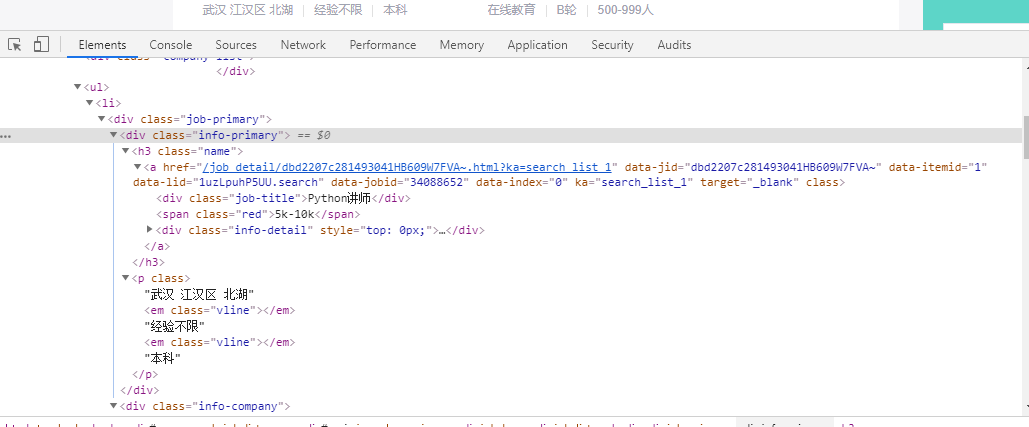

In [114]:
from IPython.display import Image
Image(filename="./data/5_3.png",width=500)

In [119]:
def bs4_parse_page(self,html):
    """
    :html：解析网页
    :return：全部标签
    """
    from bs4 import BeautifulSoup
    
    # 创建BeautifulSoup解析工具,使用lxml解析器进行解析
    html1=BeautifulSoup(html,"lxml")
    
    # 通过CSS选择器搜索div节点
    result=html1.select('div[class="info-primary"]')
    
    return result

In [120]:
result=bs4_parse_page(spider,html)

通过for...in循环遍历result列表,使用CSS选择器获取上述子元素的文本,并将这些元素的含义与文本以字典的形式保存到列表中

In [121]:
items=[]
for site in result:
    item={}
    url="https://www.zhipin.com"
    names=site.select('h3 a div')[0].get_text()
    links=site.select('h3 a')[0].attrs['href']
    locations=site.select('p')[0].get_text()
    moneys=site.select('h3 a span')[0].get_text()
    
    item["职位名称"]=names
    item["详情连接"]=url+links
    item["工作地点"]=locations
    item["薪资范围"]=moneys
    
    items.append(item)
    
print(items)

[{'职位名称': 'Python讲师', '详情连接': 'https://www.zhipin.com/job_detail/dbd2207c281493041HB609W7FVA~.html', '工作地点': '武汉 江汉区 北湖经验不限本科', '薪资范围': '5k-10k'}, {'职位名称': 'Python开发', '详情连接': 'https://www.zhipin.com/job_detail/e7f83d8ffedf59c31Hd529u0FlQ~.html', '工作地点': '武汉 洪山区 光谷经验不限本科', '薪资范围': '7k-12k'}, {'职位名称': 'Python研发工程师', '详情连接': 'https://www.zhipin.com/job_detail/db7055d31ac753581nN629--EVA~.html', '工作地点': '武汉 洪山区 珞狮南路经验不限本科', '薪资范围': '10k-20k'}, {'职位名称': 'Python', '详情连接': 'https://www.zhipin.com/job_detail/f22516357962b10d1Xx53Ny-ElM~.html', '工作地点': '武汉 江夏区 光谷东3-5年本科', '薪资范围': '10k-15k'}, {'职位名称': 'Python编程老师', '详情连接': 'https://www.zhipin.com/job_detail/ad22dc9d45b186c91XVz2NW1GVs~.html', '工作地点': '武汉 洪山区 光谷1年以内本科', '薪资范围': '8k-15k'}, {'职位名称': 'Python', '详情连接': 'https://www.zhipin.com/job_detail/df97dd26ec6c209b0XZy09q_EA~~.html', '工作地点': '武汉 洪山区 光谷3-5年本科', '薪资范围': '14k-24k'}, {'职位名称': 'python讲师', '详情连接': 'https://www.zhipin.com/job_detail/c40994d6bccbcf231Xx429q1FFc~.html', '工作地点': '武汉 江岸区 

### 5.将数据保存在文件中

In [124]:
def save_file(self,items):
    file=open("job.json","wb+")
    file.write(str(items).encode())
    file.close()

In [125]:
save_file(spider,items)